# CS229 Problem Set 1
## Problem 5.2 局部加权线性回归

### 问题定义
使用局部加权线性回归算法来将我们的数据集平滑化，(a)首先先对训练集中的第一个样本平滑化，(b)其次在对整个训练集和测试集平滑化,(c)重复b使用参数$\tau = 1,10,100,1000$。要求使用最小二乘法，而不是梯度上升。

**目标函数**
$$
J(\theta)=\frac{1}{2} \sum_{i=1}^{m} w^{(i)}\left(\theta^{T} x^{(i)}-y^{(i)}\right)^{2}
$$
**最小二乘-目标函数**
$$
J(\theta)=(X \theta-\vec{y})^{T} W(X \theta-\vec{y})
$$
**最小二乘-参数更新公式：**
$$\theta = (X^TWX)^{(-1)}X^TW \vec y$$

其中，W为对角矩阵，$W_{ii} = \frac{1}{2} w^{(i)}$。

在例子中，我们选取权值$w^{(i)}$为
$$
w^{(i)}=\exp \left(-\frac{\left(x-x^{(i)}\right)^{2}}{2 \tau^{2}}\right)
$$
$\tau = 5$

### 1.导入库文件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. 预处理数据

In [2]:
pd_train = pd.read_csv('data/quasar_train.csv')

Y = pd_train.head(1).values.T
X = np.vstack((np.ones(pd_train.columns.shape), pd_train.columns.values.astype(float))).T

### 3.算法

In [3]:
def build_weight(r,X,x_i):
    return np.diag(np.exp(-(X-x_i)[:,1]**2/(2*r**2)))

In [4]:
def normal_equation(r,X,Y):
    Y_hat = np.zeros(Y.shape[0])
    for i in range(Y.shape[0]):
        W = build_weight(r,X,X[i,:])
        theta = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)
        Y_hat[i] = X[i,:].dot(theta)  # 对当前xi进行预测，存储预测结果
    return Y_hat

### 4.问题(a)

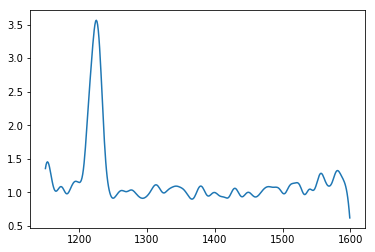

In [5]:
Y_hat = normal_equation(5,X,Y)
plt.plot(X[:,1],Y_hat,label="r=5")
plt.show()

### 5.问题(c)

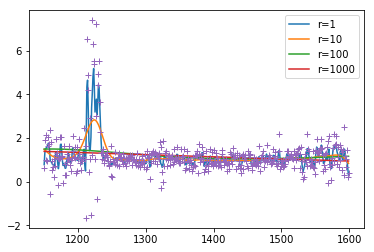

In [6]:

Y_hat = normal_equation(1,X,Y)
plt.plot(X[:,1],Y_hat,label="r=1")

Y_hat = normal_equation(10,X,Y)
plt.plot(X[:,1],Y_hat,label="r=10")

Y_hat = normal_equation(100,X,Y)
plt.plot(X[:,1],Y_hat,label="r=100")

Y_hat = normal_equation(1000,X,Y)
plt.plot(X[:,1],Y_hat,label="r=1000")

plt.legend()
plt.plot(X[:,1],Y,'+',label = "Raw data")

plt.show()

### 6.问题(b)

In [ ]:
## Question 5 c(i)           smooth the train and test data
Y_train_hat = np.zeros((pd_train.shape))
for i in range(Y_train_hat.shape[0]):
    Y = pd_train.values[i,:].T
    Y_train_hat[i,:] = normal_equation(5,X,Y)
Y_train_res = pd.DataFrame(Y_train_hat,columns=pd_train.columns.values.astype(float))
Y_train_res.to_csv('smooth_train.csv')

pd_test = pd.read_csv('quasar_test.csv')
Y_test_hat = np.zeros((pd_test.shape))
for i in range(Y_test_hat.shape[0]):
    Y = pd_test.values[i,:].T
    Y_test_hat[i,:] = normal_equation(5,X,Y)
Y_test_res = pd.DataFrame(Y_test_hat,columns=pd_test.columns.values.astype(float))
Y_test_res.to_csv('smooth_test.csv')